# I. Business Understanding
A sneak peek into the Airbnb activity in Boston, MA, USA [Kaggle Link](https://www.kaggle.com/datasets/airbnb/boston)

# II. Data Understanding


- listings.csv : Including full descriptions and average review score


# III. Data Preparation

- #### import packages, read listings.csv



In [3]:
#Import packages for data manipulation and plotting:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


#Reading the csv with the Listing Details of the Houses listed on Boston Airbnb 
df = pd.read_csv('./listings.csv')

print("Number of Rows: {} and Number of Columns: {}".format(df.shape[0], df.shape[1]))
df.head()


Number of Rows: 3585 and Number of Columns: 95


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25





- #### Identify missing values and clean data on Price Column




In [4]:
# print(df['price'].isna().sum() )

if df['price'].isna().sum() > 0:
    df.dropna(subset=['price'], how='any')  
    print("Number of null values in Price column: {}".format(df['price'].isnull().sum()))  
else:
    print ("No null values found on price column")

   
print("Now cleaning Price Column, since $ and , make the price string and we cannot get the mean of the String for our further study, so replacing $ and , with blank") 
    
# reference: https://sparkbyexamples.com/pandas/pandas-replace-string-examples/
df['price'] = df['price'].apply(lambda x : (x.replace('$','').replace(',','')))
df['price'] = df['price'].astype(float)


df['price'].head()

No null values found on price column
Now cleaning Price Column, since $ and , make the price string and we cannot get the mean of the String for our further study, so replacing $ and , with blank


0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

# IV. Modeling and Evaluation
## 1. Average Price of listings per Neighborhood


     neighbourhood_cleansed       price
21  South Boston Waterfront  306.060241
2               Bay Village  266.833333
13         Leather District  253.600000
1                  Back Bay  240.950331
8                  Downtown  236.459302
6                 Chinatown  232.352113
3               Beacon Hill  224.443299
10                   Fenway  220.393103
23                 West End  209.591837
22                South End  204.349693
5               Charlestown  198.045045
17                North End  195.678322
20             South Boston  187.609195
19                  Roxbury  146.333333
12            Jamaica Plain  138.478134
14    Longwood Medical Area  138.444444
16             Mission Hill  121.967742
9               East Boston  119.153333
4                  Brighton  118.767568
0                   Allston  112.307692
24             West Roxbury  107.108696
18               Roslindale   98.428571
7                Dorchester   91.639405
11                Hyde Park   86.548387


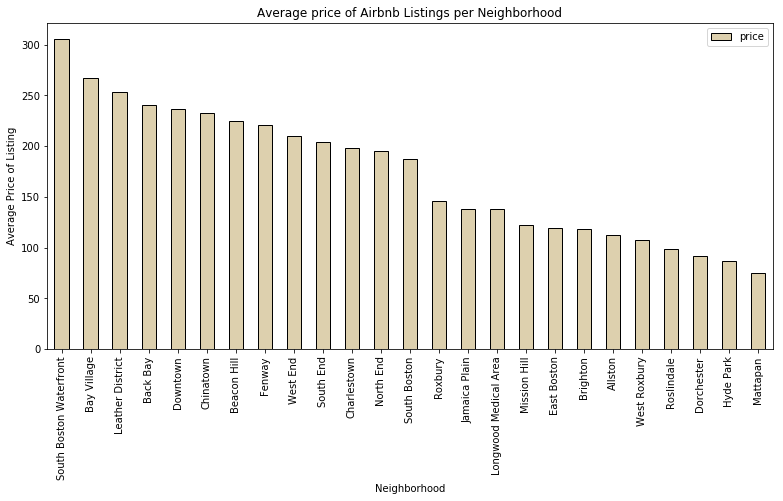

In [5]:

# Reference: https://datascienceparichay.com/article/pandas-groupby-mean/  
# https://www.easytweaks.com/pandas-groupby-to-dataframe/
# https://kanoki.org/2019/09/04/pandas-groupby-tutorial/


averagePricePerNeighborhood = df.groupby('neighbourhood_cleansed')['price'].mean().to_frame().reset_index()
averagePricePerNeighborhood = averagePricePerNeighborhood.sort_values(by=['price'], ascending=False)
print(averagePricePerNeighborhood)
price = df['price']


#Display Bar Chart
averagePricePerNeighborhood.plot.bar(x= "neighbourhood_cleansed", y = "price", color ='#ddd0ae', alpha = 1,
                                     ec = 'black', width = 0.5, figsize = (13,6))

 
plt.xlabel("Neighborhood")
plt.ylabel("Average Price of Listing")
plt.title("Average price of Airbnb Listings per Neighborhood")

plt.show()

## 2. Average Rating of listings per Neighborhood


     neighbourhood_cleansed  Average Rating
13         Leather District       98.333333
18               Roslindale       95.380000
24             West Roxbury       95.212121
21  South Boston Waterfront       94.431034
12            Jamaica Plain       94.159322
14    Longwood Medical Area       94.000000
20             South Boston       93.980392
17                North End       93.725000
5               Charlestown       93.697368
3               Beacon Hill       93.378698
22                South End       93.264925
2               Bay Village       93.000000
8                  Downtown       92.432203
11                Hyde Park       92.280000
6                 Chinatown       92.121951
1                  Back Bay       91.531646
15                 Mattapan       91.000000
4                  Brighton       90.864662
23                 West End       90.333333
9               East Boston       90.272059
0                   Allston       90.164835
19                  Roxbury     

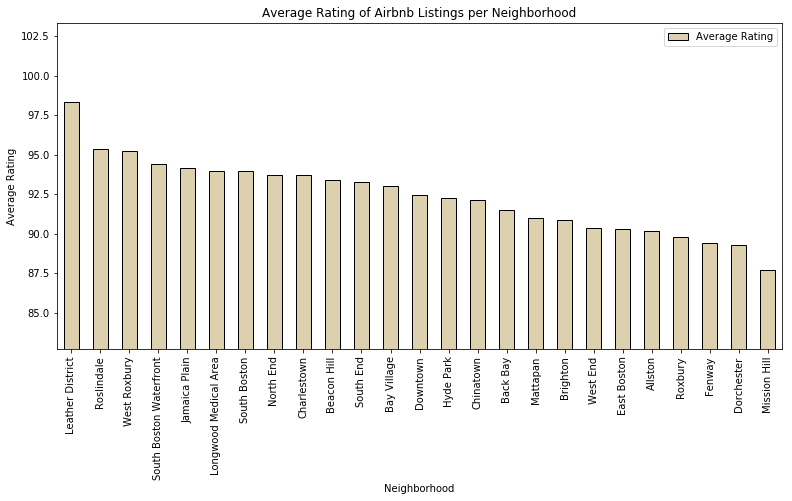

In [6]:
df_AverageRatingPerNeighborhood = df.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean().reset_index(name='Average Rating').sort_values(by=['Average Rating'], ascending=False)
print(df_AverageRatingPerNeighborhood) 

print(df_AverageRatingPerNeighborhood['Average Rating'].min())

#Display Bar Chart
df_AverageRatingPerNeighborhood.plot.bar(x= "neighbourhood_cleansed", y = "Average Rating", color ='#ddd0ae',
         alpha=1, width = 0.5, figsize = (13,6), ec = 'black')
 
plt.xlabel("Neighborhood")
plt.ylabel("Average Rating")
plt.title("Average Rating of Airbnb Listings per Neighborhood")

#Changing the ylim since the values range from 87-98 and it gets difficult to distinguish the results of such close range,
#hence starting point is lowest number - 5 and end range is highest number + 5
#https://www.delftstack.com/howto/matplotlib/how-to-set-limit-for-axes-in-matplotlib/
plt.ylim(df_AverageRatingPerNeighborhood['Average Rating'].min()-5,df_AverageRatingPerNeighborhood['Average Rating'].max()+5)


plt.show()


## 3. Top amenities offered for the listings

In [7]:
df['amenities'].head(10)

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
5    {"Cable TV","Wireless Internet","Air Condition...
6    {TV,Internet,"Wireless Internet",Kitchen,"Free...
7    {TV,Internet,"Wireless Internet","Air Conditio...
8    {"Wireless Internet","Pets live on this proper...
9    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object

<bound method NDFrame.head of                                    Amenities  Count
43                          WirelessInternet   3421
21                                   Heating   3384
26                                   Kitchen   3284
12                                Essentials   2994
36                             SmokeDetector   2911
2                            AirConditioning   2821
39                                        TV   2607
24                                  Internet   2577
10                                     Dryer   2476
40                                    Washer   2475
6                     CarbonMonoxideDetector   2442
35                                   Shampoo   2421
20                                   Hangers   1985
13                        Family/KidFriendly   1888
27                   LaptopFriendlyWorkspace   1834
25                                      Iron   1828
19                                 HairDryer   1811
5                                 

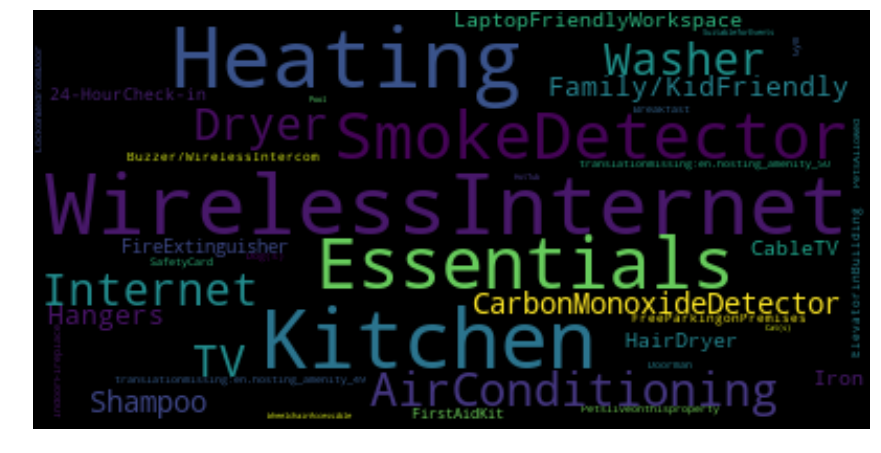

In [8]:
# Combine All amenities rows into a single tempString for data cleaning

tempString = ' '.join(df['amenities'])

# Replace {, }, " to blank
tempString = tempString.replace("{","").replace("}",",").replace("\"","").replace(" ","")
# print (len(s))
# print(tempString)

# Split the string by comma, convert the list to DataFrame
df_ListOfAmenities = pd.DataFrame(tempString.split(","))
# print(tempString.split(","))

df_ListOfAmenities.columns = ['Amenities']


# by-deafult df columnName is '0', Change it to 'Amenities'
df_ListOfAmenities.columns = ['Amenities']

# Group by amenities to obtain the count of each amenity
df_ListOfAmenities = df_ListOfAmenities.groupby(['Amenities'])['Amenities'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)

print(df_ListOfAmenities.head)

# Creating a tempDicitonary to to display a word cloud of top amenities offered 

tempDictionary = {}
for a, x in df_ListOfAmenities.values:
    tempDictionary[a] = x

# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# Reference : https://www.datacamp.com/tutorial/wordcloud-python

wordcloud = WordCloud(max_font_size=40, max_words=2000, background_color="black")
# wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies = tempDictionary)
plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()





## 4. Average Price as per the Type of Property


      property_type       price
7        Guesthouse  289.000000
2              Boat  268.833333
10            Other  229.941176
4       Condominium  190.246753
12            Villa  189.500000
9              Loft  185.410256
0         Apartment  181.966692
11        Townhouse  149.037037
8             House  131.599644
1   Bed & Breakfast  129.365854
6      Entire Floor  122.000000
5              Dorm   62.500000
3         Camper/RV   60.000000


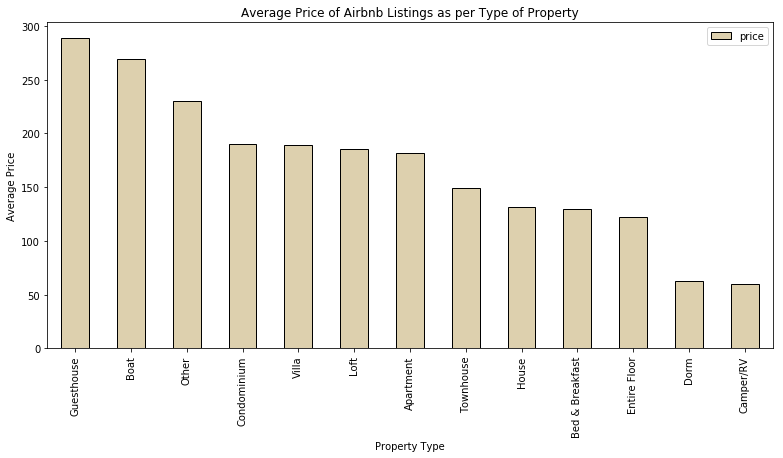

In [9]:
df_propertyTypeAndPrice = df.groupby(['property_type'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=False)
print(df_propertyTypeAndPrice)   


#Display Bar Chart
df_propertyTypeAndPrice.plot.bar(x= 'property_type', y = 'price', color = '#ddd0ae',
         alpha=1, width = 0.5, figsize = (13,6), ec = 'black')
 
plt.xlabel("Property Type")
plt.ylabel("Average Price")
plt.title("Average Price of Airbnb Listings as per Type of Property")
# plt.ylim(df_AverageRatingPerNeighborhood['Average Rating'].min()-5,df_AverageRatingPerNeighborhood['Average Rating'].max()+5)


plt.show()



## 5. Average Price as per the Room Type


         room_type       price
0  Entire home/apt  227.436765
1     Private room   96.041364
2      Shared room   92.762500


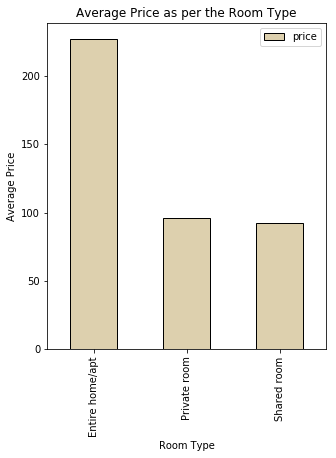

In [10]:
df_roomTypeAndPrice = df.groupby(['room_type'])['price'].mean().to_frame().reset_index().sort_values(by=['price'], ascending=False)
print(df_roomTypeAndPrice) 


#Display Bar Chart
df_roomTypeAndPrice.plot.bar(x= 'room_type', y = 'price', color = '#ddd0ae',
         alpha=1, width = 0.5, figsize = (5,6), ec = 'black')
 
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Average Price as per the Room Type")
# plt.ylim(df_AverageRatingPerNeighborhood['Average Rating'].min()-5,df_AverageRatingPerNeighborhood['Average Rating'].max()+5)


plt.show()


## 6. Distribution of Listings as per RoomType

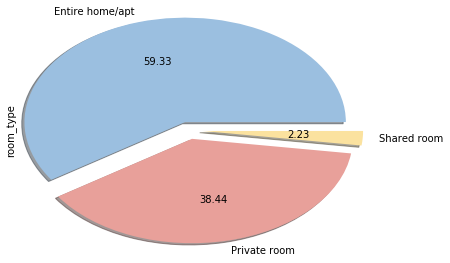

In [12]:
df_roomTypeAndCount = df.groupby(['room_type'])['room_type'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
# print(roomTypeAndPrice)
colors = ['#9BBFE0', '#E8A09A', '#FBE29F']
myExplode = [0.1, 0.1, 0.1]

#Display Pie Chart
plt.axis("auto")
df.groupby(['room_type'])['room_type'].count().plot(kind = 'pie', explode = myExplode, autopct= '%.2f',
                    colors = colors, shadow=True, radius = 1.2)





## 7. Hosts with most listings (Only considering Hosts having 10 or more listings)

In [2]:
# References
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/


df_GroupByHost = df.groupby(['host_id','host_name'])['host_id'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
# df2 = pd.read_csv('./calendar.csv')
# df2.head()

# Only considering Hosts having 10 or more listings
df_GroupByHost = df_GroupByHost[df_GroupByHost['Count'] > 10]  

print(df_GroupByHost)

#Display Bar Chart
df_GroupByHost.plot.bar(x= 'host_name', y = 'Count', color = '#ddd0ae',
         alpha=1, width = 0.5, figsize = (13,6), ec = 'black')
 

plt.xlabel("Host Name")
plt.ylabel("Number of Listings")
plt.title("Hosts with most listings")
plt.show()



NameError: name 'df' is not defined

## 8. Neighborhoods with most listings


     neighbourhood_cleansed  Count
12            Jamaica Plain    343
22                South End    326
1                  Back Bay    302
10                   Fenway    290
7                Dorchester    269
0                   Allston    260
3               Beacon Hill    194
4                  Brighton    185
20             South Boston    174
8                  Downtown    172
9               East Boston    150
19                  Roxbury    144
17                North End    143
16             Mission Hill    124
5               Charlestown    111
21  South Boston Waterfront     83
6                 Chinatown     71
18               Roslindale     56
23                 West End     49
24             West Roxbury     46
11                Hyde Park     31
2               Bay Village     24
15                 Mattapan     24
14    Longwood Medical Area      9
13         Leather District      5


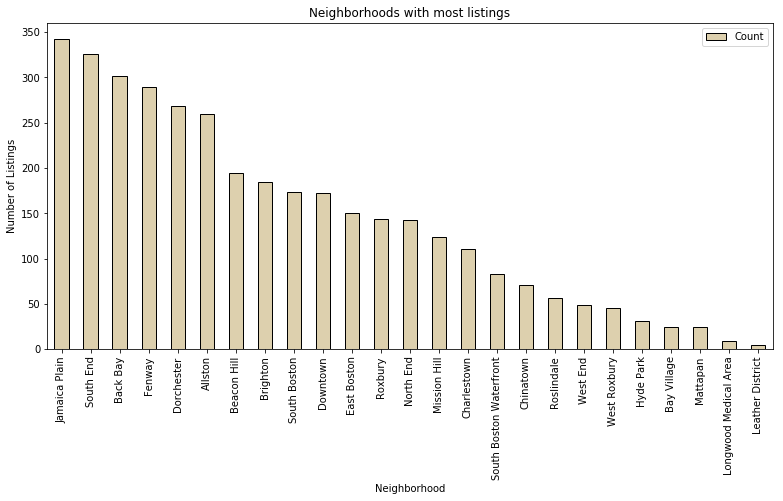

In [11]:
df_NeighborhoodMostListings = df.groupby(['neighbourhood_cleansed'])['neighbourhood_cleansed'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)
print(df_NeighborhoodMostListings)


#Display Bar Chart
df_NeighborhoodMostListings.plot.bar(x= 'neighbourhood_cleansed', y = 'Count', color = '#ddd0ae',
         alpha=1, width = 0.5, figsize = (13,6), ec = 'black')
 

plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Neighborhoods with most listings")
plt.show()



